<a href="https://colab.research.google.com/github/kirantrk/DS-PARTICE-1/blob/master/TF_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
dataset , metadata = tfds.load('fashion_mnist' , as_supervised=True , with_info=True)
train_dataset , test_dataset = dataset['train'],dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
def normalize(images , labels):
  images = tf.cast(images , tf.float32)
  images/= 255
  return images , labels
  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)
  train_dataset = train_dataset.cache()
  test_dataset = test_dataset.cache()

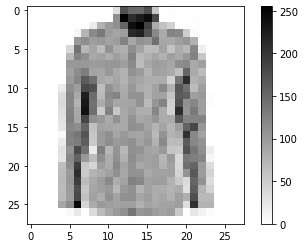

In [9]:
for image , label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image , cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

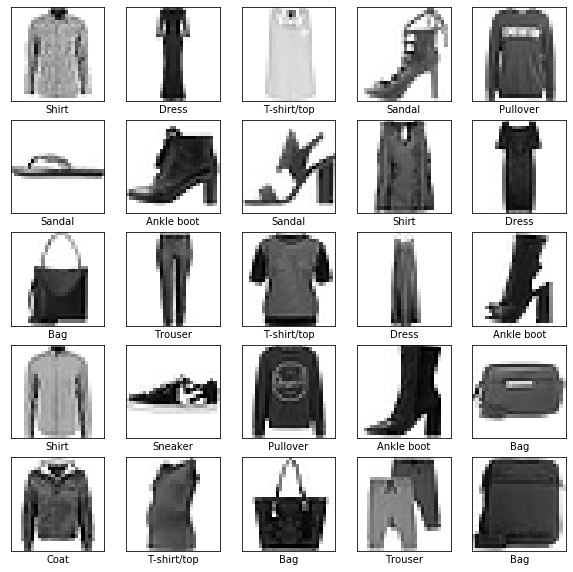

In [10]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
model = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32,(3,3) ,padding='same' , activation=tf.nn.relu , input_shape=(28,28,1)),
     tf.keras.layers.MaxPooling2D((2,2) , strides=2),
     tf.keras.layers.Conv2D(64,(3,3) , padding='same' , activation=tf.nn.relu),
     tf.keras.layers.MaxPool2D((2,2) , strides=2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation=tf.nn.relu),
     tf.keras.layers.Dense(10,activation=tf.nn.softmax)                        

])

In [0]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [14]:
model.fit(train_dataset , epochs=10 , steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5277 - accuracy: 0.8579
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2715 - accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2376 - accuracy: 0.9130
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2128 - accuracy: 0.9205
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1935 - accuracy: 0.9290
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1726 - accuracy: 0.9359
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1622 - accuracy: 0.9406
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1466 - accuracy: 0.9458
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1390 - accuracy: 0.9481
Epoch 10/10
1875/1875 [============================

In [15]:
test_loss , test_accuracy = model.evaluate(test_dataset , steps = math.ceil(num_test_examples/32))
print(test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3523 - accuracy: 0.9091
0.9091


In [16]:
for test_images , test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_lables = test_labels.numpy()
  predictions = model.predict(test_images)

TypeError: ignored

In [0]:
predictions.shape

In [0]:
predictions[0]

In [0]:
np.argmax(predictions[0])

In [0]:
test_labels[0]